In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+math.exp(-x))

In [5]:
# Generate some sigmoid data set
dat = []
for i in range (-300, 300):
    dat.append(sigmoid(i/10))
# Generate some spikes in a random direction every 50 data poinds starting at n = 50
spikes = []
for i in range (0, len(dat)):
    if (i+50)%50== 0:
        spikes.append(0.7*np.random.choice([-1,1]))
    else:
        spikes.append(0)
# Generate some spikes in a random direction that last for 3 points every 50 data poinds starting at n = 50
spikes2 = []
i = 0
while i < len(dat):
    
    if (i+50)%63== 0:
        rdir = np.random.choice([-1, 1]) # Get random -1 or 1
        spikes2.append(0.7*rdir)
        spikes2.append(0.7*rdir)
        spikes2.append(0.7*rdir)
        spikes2.append(0.7*rdir)
        i += 3
    else:
        spikes2.append(0)
    i += 1
# Add spikes to data
sdat = np.add(spikes2, dat)

TypeError: xlabel() missing 1 required positional argument: 'xlabel'

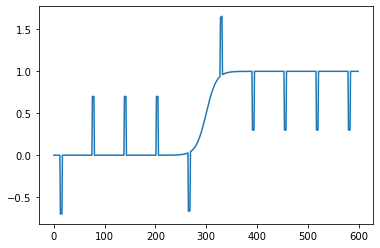

In [6]:
plt.plot(sdat)
plt.xlabel()
plt.show()

In [7]:
# Takes value (val) and checks against dataset (d_set) and checks if it's an outlier
# Returns either value or median of data set if outlier
# Outlier check based on whether or not value is within 3 sigma of mean
# Sigma is approximated by 1.4826*(Median absolute deviation)
# Needs numpy

def is_outlier(val, d_set):
    med = np.median(d_set) # Get median
    #mad = np.median(np.subtract(d_set, med)) # Get median absolute deviation
    mad = np.median(np.abs(d_set- med)) # Get median absolute deviation
    asigma = np.abs(mad*3*1.4826) # Absolute value of approximate sigma
    if (med-asigma) < val < (med+asigma):
        return val
    return med

# Pad dataset before filter based on window provided
# Give data set (d_set), and window width (x)
def winpad(d_set, x):
    if (x % 2 == 0): # Check if window is even
        raise Exception('Window width must be odd!')
    rad = np.int(np.floor(x/2)) # Calculate radius of window given
    pad = np.pad(d_set, rad, 'edge')
    return pad

# Hampel filter, input dataset (dset) and window width (x)
# Input an odd window or the window will be asymmetric and something fucks up
def hampel(d_set, x):
    if (x % 2 == 0): # Check if window is even
        raise Exception('Window width must be odd!')
    out = []
    temp = winpad(d_set, x)
    rad = np.int(np.floor(x/2))
    for i in range (0, len(d_set)):
        out.append(is_outlier(d_set[i], temp[i:i+x]))
    return out

In [8]:
# Variable outlier check, constant is multiplied by sigma
# Determines if outlier based on if the value is within const*sigma of median
def is_outlier_var(val, d_set, const):
    med = np.median(d_set) # Get median
    #mad = np.median(np.subtract(d_set, med)) # Get median absolute deviation
    mad = np.median(np.abs(d_set- med)) # Get median absolute deviation
    asigma = np.abs(mad*const*1.4826) # Absolute value of approximate sigma
    if (med-asigma) < val < (med+asigma):
        return val
    return med
# Variable Hampel filter, input dataset (dset), window width (x), and constant to determine outlier
# Equivalent to a median filter if the constant provided is 0
def hampel_var(d_set, x, const):
    if (x % 2 == 0): # Check if window is even
        raise Exception('Window width must be odd!')
    out = []
    temp = winpad(d_set, x)
    rad = np.int(np.floor(x/2))
    for i in range (0, len(d_set)):
        out.append(is_outlier_var(d_set[i], temp[i:i+x], const))
    return out

In [9]:
# Filter testing 

C:\Users\jmswe\AppData\Local\Temp/ipykernel_21880/3133414679.py:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rad = np.int(np.floor(x/2)) # Calculate radius of window given
C:\Users\jmswe\AppData\Local\Temp/ipykernel_21880/3133414679.py:32: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

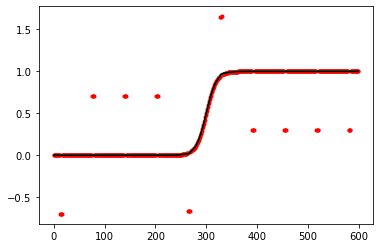

In [10]:
import scipy.signal as signal
import matplotlib.pyplot as plt

plt.plot(sdat, 'r.', hampel(sdat, 15), 'g',signal.medfilt(sdat,15), 'k')
plt.show()

In [686]:
# Generate test signals
t = np.linspace(0, 1, 500, endpoint=False)
# Some sinusoidal signal
sig = np.sin(2*np.pi*t)
# Square wave with 50% duty cycle
swave = signal.square(2 * np.pi * 5 * t)
# Irregularly spaced square waves with irregular widths
swave2 = signal.square(2*np.pi*5*t, duty = (sig+1)/2)
# Sum of sine wave with square waves
sig2 = np.add(swave, sig)
sig3 = np.add(swave2, sig)

In [693]:
import numpy.fft as fourier

# Take fft of square wave
fswave = fourier.fft(swave)
fswave2 = fourier.fft(swave2)
# FFT of signals
fsig = fourier.fft(sig)
fsig2 = fourier.fft(sig2)
fsig3 = fourier.fft(sig3)

In [694]:
# Plot power spectrum of stuff
plt.plot(np.abs(fswave2))
plt.show()

In [681]:
plt.plot(hampel(swave2, 11))
plt.show()

In [689]:
plt.plot(sig3, 'r', hampel(sig3, 11), 'g')
plt.show()

In [699]:
plt.plot(fswave2,'r', np.abs(fourier.fft(hampel(fswave2, 11))),'g')
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [713]:
plt.plot(np.abs(fsig3), 'r', np.abs(fourier.fft(hampel(sig3, 11))), 'k')
plt.show()

In [712]:
plt.plot(sig3,'r', hampel(sig3, 45),'g', signal.medfilt(sig3, 45), 'k')
plt.show()

In [721]:
# Actual crystallization data
xdat = (0.644675016172796545, 0.6520451213278872782, 0.657549253061957661, 0.6602391360538896192, 0.6604014674452499678, 0.6592560320531606344, 0.658251320713616694, 0.658343930252600962, 0.659617268203368412, 0.6614193946303694727,0.662880912883248796, 0.663447176188532439, 0.663140044792955741, 0.662487799539622557, 0.6621795121002947981, 0.6625685352103558579, 0.6632860262027994169, 0.663283407412581960, 0.661392466467909279,0.657070765683121616, 0.650785598012475153, 0.643755851272259538, 0.637298682965196317, 0.632290884427468725, 0.6290218699680982795, 0.627321148896410441, 0.6267392661529939124, 0.626741485498282680,0.626967214147060470, 0.6274504860722602828, 0.628554545410178078, 0.630561541314142104, 0.6332503161705856920, 0.6358945866809454506, 0.637717957737757968, 0.6383884613801248387, 0.6381340290895600731,0.637447490610177026, 0.636672621008051776, 0.6357822529959672453, 0.634491691845335160, 0.6326375534364440112, 0.630536089461374627, 0.628959104963376703, 0.6286065387019161843, 0.629396651064295321,0.630171580467811743, 0.629273955917918793, 0.625918882717661274, 0.621630833012597139, 0.620638522489304623, 0.628397097591766429, 0.6484519339590102405, 0.6792432520186414413, 0.7131291516833692112,0.738922275988981858, 0.7469485516387314172, 0.733817131350069540, 0.704199493426605594, 0.668673241697989140, 0.6388134011963285674, 0.622147430961450310, 0.619575566038212955, 0.626266112342986903,0.634986990377862215, 0.639814817769797761, 0.6384908537392774974, 0.6326676008248133254, 0.626310324739709157, 0.623291035556502671, 0.625445583513416392, 0.631944310368278917, 0.640024929392960740,0.6464207947590877579, 0.6486116726761023132, 0.6454675768936579683, 0.637540449273718002, 0.6274011396164862475, 0.619707209314136809, 0.619924464011294418, 0.6310516471950859962, 0.649519134293594203,0.6633804201188410188, 0.6562378918868223554, 0.618038463556218276, 0.5593673947974049376, 0.5211792352374967630, 0.570439667047546117, 0.777475374246665796, 1.18321386772782011, 1.77605686054406520,2.494022449510166606, 3.244699296309836445, 3.91948291277300731, 4.39600833877911601, 4.552099130622109691, 4.309915376494133810, 3.690464463844578713, 2.83322036208719252, 1.95365738718532289,1.256830801967031785, 0.858583611229470134, 0.7602827775584838355, 0.884042831613201408, 1.13673251796293084, 1.461450195042242051, 1.85326324261149633, 2.339115588876979235, 2.93364794876954882,3.59026593130337268, 4.180768162556844025, 4.537266249109753957, 4.548331250270648773, 4.24269920967869041, 3.787962880521819731, 3.399509011819602744, 3.22948793289426428, 3.311848515858621500,3.58325269181677353, 3.94526823150344974, 4.32052478238224857, 4.675357126530096608, 5.00931182102715411, 5.33075400163710356, 5.639663017395064593, 5.92649490854715921, 6.18217792492655338,6.40864024770221885, 6.621548613945014594, 6.84362990387275438, 7.093800552952830962, 7.378303412022058971, 7.68641057445560882, 7.99166642578997077, 8.25907135442475138, 8.456844438663324581,8.570072191375512460, 8.61014379130222807, 8.61175296350088004, 8.617021410935326031, 8.65647303873639729, 8.73776732701706749, 8.847948114678130693, 8.96657692397892170, 9.07952044616650333,9.18468376307955481, 9.28803317499606784, 9.39366427689286887, 9.49578397662322793, 9.57908584750745185, 9.62701689063485944, 9.63317953221916135, 9.60832788727114462, 9.57523891733932153, 9.55422266228263339,9.55200409389279592, 9.56215968257052928, 9.574698706360258882, 9.58553680165287325, 9.59713443844706582, 9.61154690511079046, 9.62488134476268087, 9.62850912019775329, 9.61598625797396345, 9.59010459815491245, 9.56268613463119444, 9.546313777029842740, 9.54532356683805361, 9.553132203439458792, 9.55840595843074503, 9.55623600058323319, 9.55430840524830671, 9.56659920430085009, 9.59667783136010577, 9.62160520868134128,9.59270805004610061, 9.462962500109910025, 9.23129486749765604, 8.97734329420108956, 8.85520349382883154, 9.02470635423541800, 9.53032581931769585, 10.1811491256742759, 10.51496700316506683,9.918953119033741217, 7.905755151782335233, 4.423818035737995480, 0.0006479800290616066771)
# Same data set but with no processing
xdat2 = (0.644640780054032803, 0.6671783574856817722, 0.6543912943452596664,0.6595793594606220722, 0.6575651695020496845, 0.665011572185903788,0.6566801501903682947, 0.643023322103545070, 0.6712525160983204842,0.667102060280740261,0.657076882664114237, 0.660266017308458686,0.6705811191350221634, 0.661257853731513023, 0.6640349966473877430,0.655184763949364424, 0.659197884611785412, 0.664965796051546931,0.6721375384368002415, 0.6581144949886947870, 0.6500119515694677830,0.630404112860560417, 0.641421123873442411, 0.6381556959822773933,0.631029731826856732, 0.622499934630468488, 0.622484676539897919,0.628985027084127069, 0.6294733134564012289, 0.642077262979000807,0.6120932872872799635, 0.6235528108663856983, 0.6380946559365838766,0.6416500101331621408, 0.641024393262341619, 0.636477203341200948,0.631838456960394979, 0.642123040976002812, 0.6383693208917975426,0.622072684345766902, 0.645464767469093204, 0.634340939577668905,0.6357295070774853230, 0.6235833293758332729, 0.6298853030893951654,0.6206688543315976858, 0.626482540741562843, 0.631304392591118813,0.630037893541157246, 0.629397017648443580, 0.644045674474909902,0.615785968257114291, 0.634737673681229353, 0.6365382382646203041,0.726566467434167862, 0.781025917734950781, 0.7310068451333791018,0.745899646542966366, 0.734043388161808252, 0.630922920769080520,0.6206383374519646168, 0.610735230613499880, 0.647341622738167644,0.6227135648950934410, 0.6311975792050361633, 0.6604491258040070534,0.6335322121158242226, 0.627794820815324783, 0.622454158961772919,0.617189797572791576, 0.6224541612900793552, 0.632616669172421098,0.655200021807104349, 0.6465176381170749664, 0.6504849882330745459,0.616716766497120261, 0.635775285540148616, 0.660906899254769087,0.625719592906534672, 0.635317517910152674, 0.620653597172349691,0.610292718512937427, 0.634630860527977347, 0.629763231845572591,0.601701893145218492, 0.655489946249872446, 0.651797265512868762,0.687442338094115257, 0.6997716259211301804, 0.702991279540583491,0.755390758858993650, 5.67691370216198266, 1.081628640647977591,4.26191404392011464, 3.559358089696615934, 5.02903078449890018,5.06437068246304989, 3.388640246121212840, 3.59547615447081626,0.8994511859491467476, 0.8858706550672650337, 1.13041173294186592,0.898535645566880703, 1.044427150394767523, 1.46363825933076441,0.9907916872762143612, 1.54023853992111981, 3.82426994852721691,2.29821520671248436, 2.149058257695287466, 4.157252391567453742,5.11913536139763892, 6.540269079618155956, 3.564256271813064814,2.619371826061978936, 3.012627357617020607, 3.845632611308246851,3.14423642959445715, 3.84938635258004069, 4.211681305197998881,4.143534497823566198, 4.710986926220357418, 4.670794788980856538,5.31631234101951122, 6.118677519261837006, 5.36096039041876793,6.42317123431712389, 7.070840528234839439, 5.52479652548208833,7.144022670341655612, 8.06667474634014070, 5.894949875306338072,8.27581498562358320, 8.98773997137323022, 6.440047929994761944,9.13344840286299586, 10.0361567696090788, 6.58931167447008193,9.33358572935685515, 9.67805807106196880, 6.72356048505753279,9.39881798182614148, 10.31165849044919014, 6.79465235024690628,10.0574431922286749,10.47044380754232407, 6.819097267463803291,10.5851611471734941, 10.6717103137634695, 7.14319895277731121,10.76071623945608735, 11.2100334134884179, 7.27346519567072392,10.17321334010921419, 11.00251065636985004, 7.21720516029745340,10.6560087669640780, 10.9782488145865500, 7.34272587392479181,10.2812929979991168, 11.0263605171348900, 7.375670066103339195,10.4858859947416931, 11.1158089858945459, 7.439666431630030274,10.26687318319454789, 10.82340027089230716, 7.39457601844333112,10.38928110897541046, 10.82869515824131668, 7.63182329921983182,10.45114119490608573, 10.7428173741791397, 7.42234745551832020,10.2228509362321347, 10.78885379736311734, 7.59169212891720235,9.97136700223200023, 10.61357342777773738, 7.21529776533134282,9.84222988365218043, 10.5463727754540741, 7.24885237682610750,10.1470593428239226, 10.5932941932696849, 7.215450350893661380,10.1400096600409597, 0.)

In [726]:
plt.plot(xdat2, 'r', hampel(xdat2,101), 'g')
plt.show()

In [727]:
import scipy.signal as signal
import matplotlib.pyplot as plt
 
# Design of filter
N  = 4    # Filter order
Wn = 0.25  # Cutoff frequency as a fraction of sampling rate
# Butterworth filter
B, A = signal.butter(N, Wn, output='ba')
# Chebyshev type 1 filter
# B, A = signal.cheby1(N, Wn, output='ba')

In [728]:
fdat =  signal.filtfilt(B,A, hampel(xdat2, 101))

In [730]:
plt.plot(xdat2, 'r', fdat, 'g')
plt.show()

In [731]:
plt.plot(xdat, 'r', fdat, 'g')
plt.show()

In [749]:
axdat = np.multiply((-0.00817894,-0.008167159,-0.008324648,-0.008684962,-0.008731281,-0.00870506,-0.008741888,-0.008362428,-0.008462838,-0.008846491,-0.008742897,-0.008633634,-0.008799378,-0.00848013,-0.009472052,-0.009314195,-0.009320785,-0.009337128,-0.009367035,-0.009171516,-0.009386244,-0.009230333,-0.009386655,-0.009323402,-0.009519529,-0.009507844,-0.009427373,-0.009112017,-0.009470624,-0.009593274,-0.009323939,-0.009514442,-0.00929698,-0.009315269,-0.009239051,-0.009307744,-0.009368943,-0.009322294,-0.009313587,-0.009537167,-0.009601834,-0.009673503,-0.009476223,-0.009736765,-0.009631134,-0.009396887,-0.009650742,-0.009742026,-0.009349068,-0.009310991,-0.009019269,-0.009234344,-0.009360907,-0.009584562,-0.009687678,-0.009539587,-0.009435432,-0.009305103,-0.009634053,-0.00959048,-0.00963903,-0.009651299,-0.00936689,-0.009571074,-0.009646071,-0.009246892,-0.00943493,-0.009525369,-0.009453392,-0.00951418,-0.00942686,-0.009439612,-0.009335615,-0.009373477,-0.009689081,-0.009439234,-0.009484055,-0.009519419,-0.009351571,-0.009430793,-0.009731638,-0.00949414,-0.041434338,-0.009192316,-0.0093636,-0.00957733,-0.009271517,-0.009430288,-0.009524571,-0.009627468,-0.009629536,-0.009599844,-0.00948054,-0.009369351,-0.009488783,-0.00927507,-0.00950766,-0.009173415,-0.009613374,-0.009595123,-0.009498602,-0.009593413,-0.009561212,-0.0095847,-0.009574628,-0.009345591,-0.009795353,-0.009576705,-0.009585335,-0.009537595,-0.009540294,-0.009406865,-0.009559661,-0.009485763,-0.009408071,-0.009260419,-0.009398696,-0.00956424,-0.009609082,-0.009468139,-0.009426642,-0.009682081,-0.009499869,-0.009563424,-0.009418891,-0.009389963,-0.009641067,-0.009587751,-0.009536347,-0.009391583,-0.009673624,-0.009557315,-0.009726864,-0.009356915,-0.009547412,-0.009496783,-0.009427302,-0.009630443,-0.009636906,-0.009621916,-0.009753916,-0.009547925,-0.009797359,-0.00942584,-0.009254568,-0.009568173,-0.009471967,-0.009721612,-0.00956388,-0.009401782,-0.009777079,-0.009559767,-0.009358788,-0.009648386,-0.009525218,-0.009560714,-0.009225788,-0.009552266,-0.009628491,-0.00920896,-0.009336749,-0.009642244,-0.009642415,-0.009787862,-0.041259665,-0.009238158,-0.00950308,-0.011330816,-0.013606986,-0.015244976,-0.018500849,-0.02146503,-0.024792849,-0.027933687,-0.030132836,-0.029716655,-0.030510096,-0.031588736,-0.031847126,-0.032429645,-0.03251926,-0.032089868,-0.032382898,-0.033241386,-0.032998843,-0.033125978,-0.03370407,-0.033124685,-0.033543064,-0.033568677,-0.033908479,-0.033752935,-0.033815499,-0.033589831,-0.033484487,-0.034008819,-0.033491137,-0.033746764,-0.033378477,-0.03372261,-0.033377912,-0.03419667,-0.033774931,-0.034134199,-0.033901272,-0.034004067,-0.033402025,-0.033408904,-0.033708933,-0.033772283,-0.033675999,-0.033790909,-0.033119663,-0.033786648,-0.033832721,-0.033653505,-0.033378229,-0.034023867,-0.034200888,-0.033696727,-0.034126054,-0.033566494,-0.033367133,-0.033742104,-0.03390417,-0.034205896,-0.033103495,-0.033440817,-0.03385594,-0.033992395,-0.034289838,-0.033650565,-0.033759412,-0.033034477,-0.034098048,-0.033269497,-0.033896247,-0.033526169,-0.03389998,-0.034221223,-0.033984792,-0.034426434,-0.034343658,-0.034297621,-0.034315245,-0.033825313,-0.034195963,-0.034046421,-0.034257989,-0.03438298,-0.034491809,-0.034180145,-0.034382233,-0.034351112,-0.034603414,-0.034048521,-0.03339886,-0.034312059,-0.034232238,-0.033397482,-0.033380822,-0.0337539,-0.034175795,-0.034152067,-0.034168365,-0.034440954,-0.034454363,-0.03438511,-0.034645475,-0.033906445,-0.034465955,-0.034109978,-0.033722117,-0.033505363,-0.033748414,-0.033512224,-0.033734951,-0.034222059,-0.034504762,-0.033891482,-0.033695166,-0.034341133,-0.034063221,-0.034048871,-0.033964621,-0.03431521,-0.032831819,-0.033898779,-0.033885254,-0.034072923,-0.034247938,-0.033954841,-0.033920901,-0.034583319,-0.034619464,-0.034583961,-0.03457732,-0.034296763,-0.034612237,-0.033953611,-0.033927159,-0.033690549,-0.033747313,-0.033793287,-0.033696361,-0.033787006,-0.033765737,-0.034005509,-0.033992053,-0.033869918,-0.033744392,-0.03425324,-0.033004262,-0.033663498,-0.033898731,-0.033968712,-0.034719652,-0.034352038,-0.034328417,-0.034591809,-0.034537324,-0.073669114,-0.035338403,-0.034442484,-0.03430012,-0.03350503,-0.033950918,-0.033358468,-0.033279743,-0.034300965,-0.033672201,-0.033907321,-0.033720563,-0.034019568,-0.034233794,-0.033998961,-0.034293743,-0.034389691,-0.034775614,-0.034682901,-0.034822398,-0.034745514,-0.034386401,-0.033656955,-0.03339759,-0.03426047,-0.034300386,-0.033164899,-0.033877989,-0.034399865,-0.034327714,-0.034225002,-0.034066312,-0.034324312,-0.033523969,-0.034032049,-0.034086262,-0.034285977,-0.034575788,-0.0340287,-0.034294764,-0.034419273,-0.034378613,-0.034684509,-0.034507341,-0.034806976,-0.034807442,-0.035072049,-0.034869591,-0.034622902,-0.034190618,-0.033997253,-0.03437367,-0.034316526,-0.033784148,-0.034117466,-0.034193358,-0.034039495,-0.033718728,-0.033828711,-0.034135584,-0.034193312,-0.0340793,-0.03419298,-0.033719228,-0.033752753,-0.034267044,-0.034768631,-0.03449011,-0.03438784,-0.034596019,-0.034702017,-0.034648476,-0.034326172,-0.03412883,-0.034262791,-0.034322436,-0.034477591,-0.034121023,-0.034378309,-0.034146418,-0.033376955,-0.033742094,-0.033416553,-0.033332662,-0.033464386,-0.033013681,-0.033581285,-0.033810108,-0.034493769,-0.034694594,-0.034783773,-0.034142776,-0.034671072,-0.034927712,-0.034915918,-0.034788354,-0.034705625,-0.034061773,-0.034676672,-0.034377494,-0.034220994,-0.03440279,-0.033765171,-0.034031803,-0.033630092,-0.033515038,-0.033367729,-0.034214399,-0.033716055,-0.034403168,-0.034648565,-0.034227572,-0.034292679,-0.034509863,-0.034282558,-0.034276673,-0.034446808,-0.034838047,-0.034598671,-0.034304038,-0.034664474,-0.034324999,-0.034476063,-0.03462472,-0.034439468,-0.034126219,-0.033900298,-0.034260298,-0.034118152,-0.033941946,-0.033692967,-0.033555402,-0.033909459,-0.033808348,-0.033491702,-0.033994663,-0.033996455,-0.034040221,-0.033970428,-0.034161206,-0.034672433,-0.034942639,-0.034750728,-0.035021199,-0.034584689,-0.034986119,-0.033691276,-0.034734537,-0.03451667,-0.034609794,-0.034031189,-0.034205037,-0.0338764,-0.03365161,-0.034258309,-0.033874955,-0.033778887,-0.033935433,-0.034174865,-0.033779675,-0.034416062,-0.034444863,-0.03445446,-0.034151372,-0.034394987,-0.034500019,-0.0345541,-0.03464446,-0.034720859,-0.033900072,-0.034460258,-0.034171465,-0.034299473,-0.03436002,-0.034417428,-0.033971135,-0.033257862,-0.034048646,-0.033753444,-0.033498432,-0.033319883,-0.03404676,-0.034143321,-0.033947201,-0.034089047,-0.033822218,-0.034150874,-0.033956812,-0.034186246,-0.034051475,-0.034345341,-0.034372016,-0.034915459,-0.034842414,-0.034931192,-0.034870541,-0.034457979,-0.033886578,-0.033572046,-0.034016489,-0.033712774,-0.034206992,-0.034074608,-0.033847283,-0.033508981,-0.033449273,-0.033262816,-0.033495066,-0.033713209,-0.033930767,-0.034425272,-0.034536707,-0.03459896,-0.03478502,-0.034514983,-0.034269057,-0.034554116,-0.03442679,-0.034695296,-0.034366294,-0.034579666,-0.034238551,-0.034757299,-0.03463302,-0.034681545,-0.034129961,-0.033988191,-0.033956356,-0.03414614,-0.033064993,-0.03388473,-0.033853759,-0.033093811,-0.033749761,-0.034386912,-0.034214332,-0.034582185,-0.034486336,-0.03417972,-0.034346224,-0.03429664,-0.033792526,-0.03422711,-0.034519655,-0.034527499,-0.03476724,-0.03433718,-0.034386389,-0.033800366,-0.034266961,-0.033754044,-0.033870836,-0.033731657,-0.034447406,-0.03403321,-0.033674133,-0.034015734,-0.033770931,-0.03374662,-0.033693095,-0.034527006,-0.03439986,-0.034473666,-0.034533795,-0.03500966,-0.03447886,-0.033911583,-0.034172013,-0.034340218,-0.034683313,-0.033726987,-0.034482585,-0.034843993,-0.033635559,-0.033904876,-0.033814157,-0.033689229,-0.033282621,-0.033816518,-0.033864027,-0.034116695,-0.033559341,-0.033987073,-0.03428791,-0.033974214,-0.034350976,-0.034504436,-0.034638578,-0.034683174,-0.034213532,-0.034558423,-0.034976466,-0.0348235,-0.034960984,-0.035147516,-0.034503093,-0.034046207,-0.03464803,-0.033898905,-0.03405779,-0.034282323,-0.033965723,-0.034161276,-0.034181287,-0.033816912,-0.034037301,-0.033918488,-0.033600363,-0.033924084,-0.034378749,-0.034097999,-0.034155057,-0.034259086,-0.033946019,-0.034435806,-0.03412896,-0.033504392,-0.034422123,-0.034207772,-0.034626325,-0.03430682,-0.033868073,-0.033661234,-0.034075699,-0.033976857,-0.033805943,-0.034021147,-0.033698916,-0.033681841,-0.03419823,-0.034093086,-0.034028015,-0.034163142,-0.034377876,-0.0347178,-0.034300649,-0.034011826,-0.034263775,-0.034460061,-0.034841688,-0.0341233,-0.034199935,-0.034738924,-0.034097153,-0.034527193,-0.034775111,-0.034628685,-0.034531408,-0.034001281,-0.033630665,-0.034027745,-0.033751056,-0.034014484,-0.033863299,-0.033869321,-0.034032051,-0.033966285,-0.033857712,-0.034109443,-0.0348192,-0.034575733,-0.034173122,-0.034514171,-0.034724281,-0.03436718,-0.034871797,-0.034928485,-0.03490343,-0.034636433,-0.03429077,-0.034085826,-0.0342118,-0.034640634,-0.033959926,-0.033817524,-0.034369678,-0.033739172,-0.033827732,-0.033725421,-0.033112019,-0.033701986,-0.033147493,-0.03378054,-0.034044188,-0.0332913,-0.034096555,-0.034787631,-0.03430698,-0.033677633,-0.034511286,-0.034464108,-0.034416422,-0.034369012,-0.034255091,-0.034459062,-0.034118344,-0.03428356,-0.034104891,-0.033987124,-0.033968086,-0.033534232,-0.034092527,-0.033967591,-0.033825378,-0.033514649,-0.033210539,-0.03401314,-0.032271769,-0.0335874,-0.033925801,-0.034938088,-0.034093347,-0.034357244,-0.0341615,-0.034170729,-0.034864009,-0.035099523,-0.034275489,-0.034282548,-0.035158459,-0.034653688,-0.034729839,-0.034406485,-0.034174683,-0.033625296,-0.034056712,-0.033764645,-0.033810007,-0.033816274,-0.034090437,-0.034235326,-0.033548824,-0.033984639,-0.03450167,-0.034034428,-0.034195079,-0.03440204,-0.034380089,-0.034360051,-0.034245889,-0.034250194,-0.034406465,-0.034931977,-0.035049322,-0.034356479,-0.034878563,-0.034509546,-0.034272586,-0.0339387,-0.033861503,-0.033802941,-0.034216613,-0.033945412,-0.034471496,-0.033649978,-0.033852706,-0.033701316,-0.033642663,-0.034177873,-0.034297231,-0.033893326,-0.033915154,-0.034467915,-0.034377031,-0.034544597,-0.034790309,-0.034997615,-0.034933508,-0.035130562,-0.034009798,-0.033666675,-0.034790625,-0.034214432,-0.034187414,-0.033608235,-0.03354748,-0.033618211,-0.033612794,-0.033877299,-0.033930907,-0.03410886,-0.034340131,-0.033727633,-0.03368113,-0.034118101,-0.034347732,-0.034194033,-0.034546245,-0.034519933,-0.034579283,-0.034340361,-0.034499933,-0.035135719,-0.034643347,-0.034580504,-0.03477923,-0.034574467,-0.033862405,-0.03386635,-0.034083659,-0.034260688,-0.033953329,-0.033510982,-0.033465051,-0.033990907,-0.033632388,-0.034172131,-0.034138087,-0.034129391,-0.033723952,-0.034423589,-0.034917018,-0.034469831,-0.033584944,-0.034452855,-0.034427643,-0.034770391,-0.034569691,-0.034720654,-0.034598389,-0.03459395,-0.034075158,-0.034470752,-0.034768811,-0.034310376,-0.034145758,-0.033509565,-0.033449397,-0.034224122,-0.033764084,-0.034227517,-0.034606275,-0.034359304,-0.033450098,-0.034054878,-0.033688514,-0.034761935,-0.034661666,-0.034358273,-0.034203715,-0.034942819,-0.035088043,-0.035372596,-0.034278525,-0.034621357,-0.034670382,-0.03403304,-0.034282166,-0.034850992,-0.034530707,-0.034478353,-0.033549408,-0.033888088,-0.032981306,-0.033619268,-0.033956864,-0.034484289,-0.034003583,-0.034051194,-0.03354714,-0.034035568,-0.034094626,-0.034576689,-0.074102746,-0.036117167,-0.035254172,-0.034716629,-0.034075805,-0.035026538,-0.034366658,-0.034321189,-0.034572651,-0.034001342,-0.034150492,-0.033788402,-0.033657801,-0.033599077,-0.03374069,-0.033543916,-0.033244848,-0.034428993,-0.034284036,-0.03442019,-0.03440971,-0.034466766,-0.034590767,-0.034044702,-0.034991667,-0.03485867,-0.034483189,-0.033759216,-0.034700058,-0.03452696,-0.034777728,-0.033911103,-0.0344318,-0.034476485,-0.033783584,-0.033841086,-0.034277039,-0.03379781,-0.034438061,-0.034246853,-0.034145835,-0.033454728,-0.034393272,-0.034268574,-0.034559841,-0.034589678,-0.034445209,-0.034627352,-0.034350804,-0.03463202,-0.035020326,-0.034957685,-0.034513464,-0.034824522,-0.03442703,-0.034337766,-0.034203583,-0.034179376,-0.034340456,-0.034840853,-0.0343185,-0.034393915,-0.034131781,-0.034241244,-0.034324971,-0.0331099,-0.03320735,-0.034137905,-0.03415698,-0.034510489,-0.034428962,-0.034524304,-0.034372049,-0.033709466,-0.03394908,-0.034548903,-0.034311245,-0.034092683,-0.034512947,-0.034388068,-0.034638645,-0.034383365,-0.034417307,-0.034111252,-0.034029159,-0.034489921,-0.034341292,-0.034117249,-0.034121726,-0.033893236,-0.03456586,-0.034428059,-0.03467197,-0.034749926,-0.034324831,-0.034365107,-0.034197227,-0.034336491,-0.034731084,-0.035007089,-0.035372565,-0.034910952,-0.034782987,-0.034232957,-0.03423106,-0.034613574,-0.034326115,-0.034250818,-0.034018179,-0.034642855,-0.033995065,-0.033706327,-0.033799472,-0.034508956,-0.03393187,-0.032783705,-0.033474939,-0.03419859,-0.033980233,-0.033826292,-0.0340397,-0.034232952,-0.034340857), -1)
axdat2 = (-0.028300847,-0.02807261,-0.028751672,-0.028807142,-0.026743998,-0.025627556,-0.02833859,-0.026678549,-0.027790525,-0.027144017,-0.027627342,-0.027169819,-0.027523238,-0.026574086,-0.033251128,-0.034455567,-0.034172474,-0.03556493,-0.036019136,-0.036021821,-0.036117729,-0.034688995,-0.035804912,-0.035979083,-0.035397656,-0.036066517,-0.036683324,-0.034880179,-0.034795571,-0.03640985,-0.035910609,-0.03567273,-0.035691331,-0.034765476,-0.036287541,-0.035426656,-0.035691993,-0.036056903,-0.035336948,-0.034644305,-0.035774782,-0.035368858,-0.037219273,-0.037127745,-0.036621378,-0.036135391,-0.034832079,-0.035287192,-0.036513473,-0.036272327,-0.035494272,-0.036081052,-0.036190705,-0.03539041,-0.036087301,-0.036238515,-0.036723109,-0.03657937,-0.036626305,-0.035662586,-0.035339449,-0.036344041,-0.03551104,-0.03594168,-0.033948055,-0.035113307,-0.034757909,-0.036103736,-0.036683458,-0.036209935,-0.034821578,-0.034454696,-0.03397304,-0.035824987,-0.035238511,-0.035024099,-0.035706764,-0.036615134,-0.035737168,-0.036086523,-0.035958758,-0.034983954,-0.03640462,-0.035652056,-0.035866705,-0.03562731,-0.035760753,-0.035407486,-0.036357271,-0.035177551,-0.037361337,-0.036166615,-0.036433308,-0.037251465,-0.036002868,-0.034781625,-0.036800464,-0.036372084,-0.035794078,-0.035047166,-0.034547366,-0.034773698,-0.035328462,-0.036846737,-0.034710659,-0.036386318,-0.035403272,-0.036244536,-0.037455657,-0.035894224,-0.035973507,-0.036817976,-0.035770968,-0.03497803,-0.036527053,-0.035928094,-0.036339551,-0.035859027,-0.03462098,-0.035288133,-0.037102991,-0.037181107,-0.036667323,-0.037527746,-0.036058035,-0.036961328,-0.036267725,-0.036055522,-0.036643793,-0.035714053,-0.036946365,-0.036716459,-0.036313886,-0.036591037,-0.035978685,-0.035368842,-0.034917876,-0.035278244,-0.035393882,-0.036590734,-0.035487648,-0.037390548,-0.037022562,-0.035479721,-0.035607508,-0.036649822,-0.035092515,-0.035665866,-0.035805065,-0.036506595,-0.036298269,-0.037161817,-0.035786362,-0.036261304,-0.035129657,-0.03449993,-0.033995297,-0.033861074,-0.032357359,-0.839673036,-0.022666696,-0.025217146,-0.030526476,-0.031876526,-0.032400967,-0.030998644,-0.0309526,-0.031663516,-0.029922328,-0.028407178,-0.026253922,-0.02301184,-0.021658417,-0.019649503,-0.0157084,-0.011000634,-0.005814039,0.00056167,0.007288545,0.011454627,0.013429677,0.014793079,0.014772581,0.014704237,0.015107605,0.015441551,0.014780976,0.015168613,0.01531675,0.014862699,0.015186984,0.015364501,0.015518796,0.014419617,0.015427381,0.014264166,0.01485414,0.015578088,0.014965382,0.014189166,0.014265418,0.014282794,0.015614893,0.015042705,0.016049965,0.015982508,0.016035578,0.015263514,0.016009738,0.015748238,0.016557413,0.015061126,0.015105042,0.01581811,0.016101767,0.016254487,0.016830957,0.015805731,0.015781995,0.015253634,0.015017285,0.013788696,0.015614573,0.01518698,0.01423807,0.01363389,0.015225983,0.014260258,0.013967939,0.014278294,0.014680458,0.015494711,0.015374002,0.014738262,0.015480074,0.015345855,0.014980872,0.015117562,0.015382029,0.015514053,0.01524539,0.016346322,0.014607097,0.015305866,0.014074181,0.014823025,0.014683923,0.013538783,0.014533258,0.013583293,0.01394945,0.013325253,0.01447048,0.014361942,0.013741707,0.015303774,0.015038175,0.015373751,0.014926083,0.01449166,0.014300473,0.014502504,0.014091448,0.014117189,0.013671573,0.013754062,0.01342766,0.014001854,0.013911534,0.013576855,0.013540238,0.014066383,0.013809434,0.013687934,0.014059481,0.014436171,0.01459204,0.014343618,0.014604582,0.014808148,0.014679809,0.014661893,0.014449417,0.014605918,0.01454457,0.013358681,0.013437928,0.013369299,0.013437112,0.0133848,0.012910212,0.012744524,0.013104756,0.014205139,0.015222577,0.01321012,0.015056251,0.014748904,0.014123741,0.013787505,0.014650898,0.014274578,0.013825007,0.014198315,0.013761968,0.014011367,0.014289941,0.01400841,0.013596839,0.012557984,0.012797233,0.01215055,0.010789351,0.012473103,0.012635002,0.011932203,0.011465434,0.01281571,0.012221023,0.012701761,0.012319952,0.013717191,0.013841548,0.013458145,0.0132913,0.013108755,0.013613033,0.014714691,0.014385628,0.014529424,0.014413002,0.014628556,0.013556707,0.0129739,0.013430009,0.012198986,0.011772018,0.0111793,0.01149889,0.011600347,0.011582661,0.012309199,0.012465979,0.012800027,0.013666814,0.012744773,0.01415239,0.014061275,0.013511998,0.012724271,0.013018627,0.013722299,0.013704114,0.013484398,0.013204122,0.013955702,0.013884304,0.012551877,0.012742571,0.012746876,0.011793836,0.011665931,0.01175243,0.011144011,0.012215025,0.01126004,0.011544181,0.011366538,0.011742841,0.012711073,0.012611758,0.013532112,0.012551371,0.013649205,0.013921843,0.014888951,0.014455902,0.013568032,0.01313741,0.012848948,0.013404556,0.012239131,0.01198388,0.012262863,0.012257828,0.011518346,0.011696656,0.011429709,0.011495662,0.01107491,0.010123014,0.011313101,0.011491209,0.011722367,0.011681165,0.011730295,0.01229305,0.012902793,0.012905545,0.012314393,0.013059361,0.013518658,0.013647637,0.013157624,0.012835125,0.011971637,0.012456765,0.011546967,0.01054645,0.010780737,0.010783768,0.011185478,0.011066488,0.010150757,0.010462919,0.010745186,0.0111603,0.012019624,0.012236285,0.012561432,0.012604953,0.012404935,0.012433615,0.012241555,0.012876771,0.011919798,0.011833763,0.011322182,0.011323192,0.010591216,0.010222397,0.01015946,0.010453291,0.009941802,0.010700543,0.009858442,0.010125773,0.009457584,0.009104405,0.009175275,0.010179281,0.010594671,0.010707911,0.011912268,0.011629654,0.012393477,0.012497449,0.012676226,0.012813196,0.013335498,0.012361547,0.012746521,0.011845365,0.011914741,0.011595479,0.010251299,0.010307634,0.010025867,0.009998256,0.010298386,0.009903768,0.010604721,0.010719937,0.009726053,0.009603922,0.009499278,0.009699719,0.010054397,0.011083104,0.011946978,0.011737989,0.011010502,0.011146968,0.012282865,0.012635142,0.012022286,0.011712619,0.012358345,0.011909965,0.010769065,0.011490059,0.010273787,0.010212231,0.009591853,0.009850066,0.009535717,0.008761696,0.008428193,0.00936303,0.009557257,0.010184006,0.0107099,0.010691433,0.010932933,0.011144276,0.011783417,0.01159119,0.012234187,0.010990545,0.011354885,0.011428163,0.011386273,0.011453701,0.011572614,0.011425869,0.011067572,0.01048942,0.010230628,0.009967929,0.009369543,0.009691429,0.009581872,0.009201606,0.0093005,0.009231901,0.009477809,0.009740715,0.010844931,0.010954024,0.010200351,0.011510484,0.008864159,0.009683069,0.010014276,0.011770613,0.011263805,0.010975251,0.011372294,0.010834194,0.009962151,0.009802834,0.010093507,0.008937635,0.008916153,0.008463046,0.008349945,0.008645866,0.008417413,0.007711757,0.008765384,0.008215499,0.009056755,0.00846105,0.00843309,0.009209816,0.009621467,0.010109796,0.009845051,0.010760546,0.011589446,0.011252335,0.011488944,0.010752193,0.010220029,0.010206703,0.009123732,0.009333829,0.008621451,0.009356278,0.009275473,0.009046354,0.008417721,0.008024545,0.008133236,0.008917613,0.009703607,0.009216798,0.009877594,0.010260209,0.009942906,0.010448178,0.010960539,0.011073294,0.010560622,0.010982038,0.010530536,0.010081958,0.009857257,0.009756042,0.009363453,0.007930115,0.008059858,0.007249888,0.008015872,0.008313689,0.007025502,0.007446312,0.007133204,0.00735065,0.008254832,0.009313151,0.008332519,0.008908634,0.009016762,0.008361636,0.009663298,0.009987763,0.010413374,0.010475245,0.009977298,0.009932015,0.010005868,0.009888575,0.00920464,0.00795998,0.00791761,0.007986046,0.007396605,0.008006781,0.007239883,0.006316858,0.006389539,0.006448888,0.006265574,0.007028477,0.007639066,0.007508949,0.008292939,0.008547943,0.0088038,0.008070536,0.008469148,0.009040889,0.009518996,0.009687071,0.009729489,0.008586352,0.010284886,0.009284535,0.00844053,0.008536689,0.007548637,0.007451464,0.007092166,0.007713198,0.007523119,0.006279908,0.006123964,0.005773476,0.0067687,0.007287123,0.008885915,0.008973441,0.009734681,0.008817755,0.009656045,0.01022856,0.009956081,0.009470817,0.008745324,0.008767134,0.00926631,0.008875358,0.007362335,0.007539499,0.008076909,0.006882575,0.007121094,0.007261321,0.006173228,0.006255733,0.006496935,0.005875128,0.006764118,0.007187712,0.008340058,0.008056872,0.007534774,0.008556638,0.008125547,0.008258111,0.008260089,0.009006084,0.009272508,0.009017995,0.008472936,0.007719648,0.007390717,0.007147892,0.006777873,0.006409494,0.007578792,0.006843555,0.006661018,0.006121745,0.007474753,0.006700202,0.007750626,0.007034905,0.008384431,0.007480741,0.008107432,0.00821135,0.00690614,0.008351608,0.009857426,0.010292918,0.010124618,0.011212915,0.010007331,0.008787019,0.009102512,0.008104539,0.007594217,0.007182698,0.007041907,0.007039775,0.007894123,0.006559709,0.004934168,0.005686362,0.00649976,0.006179078,0.006281251,0.00814582,0.009094501,0.007782816,0.008548787,0.007854498,0.007928361,0.008449682,0.008792657,0.008070244,0.009142064,0.008928608,0.009513755,0.008339163,0.007648971,0.007100813,0.00705168,0.006838664,0.007297185,0.007064608,0.006149659,0.005933407,0.00573958,0.006088922,0.006825632,0.006692318,0.00586559,0.006415077,0.005928099,0.007103788,0.007484303,0.008512571,0.009182699,0.009207427,0.009918308,0.008460703,0.008452679,0.008000965,0.00758102,0.007140222,0.007073916,0.007386069,0.008307361,0.007271793,0.007446981,0.005975623,0.006768667,0.006000174,0.005529516,0.007026864,0.007481357,0.007368794,0.00763122,0.007168755,0.008302999,0.008072216,0.008342245,0.007851575,0.007600569,0.007570577,0.008133998,0.007016675,0.007594578,0.006974638,0.006508865,0.007110191,0.006143708,0.006129088,0.006295124,0.006355348,0.005630397,0.00495041,0.004096531,0.004033965,0.005737734,0.006183118,0.006625131,0.006428804,0.005807242,0.005935154,0.005720997,0.007135992,0.007922836,0.007737208,0.007600283,0.009050734,0.008366116,0.008523046,0.007303519,0.006383847,0.007655525,0.008079997,0.007411735,0.007321488,0.00741225,0.0061794,0.004408239,0.005235411,0.005728224,0.006100638,0.006623998,0.007187886,0.007984124,0.008958448,0.009342829,0.008396539,0.008569547,0.008311249,0.008505175,0.00852346,0.008979361,0.007687819,0.007214786,0.007108687,0.006990389,0.006781862,0.00663076,0.007003367,0.005697503,0.006050605,0.00576749,0.00541048,0.00470803,0.004907454,0.006414534,0.006335621,0.00538204,0.006046203,0.007191549,0.007252089,0.006456368,0.007028169,0.007180356,0.0064267,0.006458049,0.006722265,0.006101241,0.006231141,0.006188387,0.006336293,0.006252116,0.006053412,0.007057256,0.006098192,0.006197031,0.004946883,0.004886537,0.005310772,0.006222315,0.006708804,0.006370791,0.005977036,0.005693376,0.00612968,0.005088987,0.00630464,0.006401753,0.00698882,0.006507227,0.007266658,0.006412096,0.007002006,0.007104828,0.005569914,0.006114384,0.006350859,0.006725556,0.007191503,0.006500402,0.005358495,0.005555357,0.00457218,0.005705411,0.006343928,0.006827989,0.008174667,0.007288053,0.007184148,0.006355097,0.007247431,0.008497936,0.008424137,0.00820604,0.007672179,0.008307739,0.007923107,0.007759941,0.006163277,0.006835564,0.006303482,0.007188552,0.007070957,0.006423326,0.00580546,0.004403072,0.005065896,0.004589215,0.005351774,0.006226991,0.006176306,0.006335053,0.006122382,0.005563769,0.006085157,0.007046655,0.007277024,0.006631465,0.007197509,0.006892453,0.006699162,0.006348321,0.006255777,0.005739132,0.005980461,0.004415496,0.004923323,0.004983611,0.004700333,0.005162808,0.004472946,0.004604611,0.004304695,0.004402441,0.00519641,0.005603119,0.006233501,0.005591231,0.005366311,0.005889089,0.007264779,0.007541961,0.007264282,0.006986233,0.006954623,0.006382585,0.00586257,0.006171808,0.006161247,0.005281353,0.006088363,0.00682929,0.006943437,0.006053212,0.004695646,0.004453483,0.004444964,0.004407654,0.004022236,0.004476532,0.005931334,0.005027061,0.005976818,0.005121257,0.005443178,0.005182275,0.006594003,0.006331746,0.006815268,0.006190554,0.005185066,0.004830941,0.004975254,0.004328493,0.004006839,0.004194485,0.004422057,0.003593965,0.003129241,0.003173976,0.003455495,0.003589997,0.003845524,0.004044345,0.0043318,0.005709585,0.004900164,0.005368173,0.005851127,0.004744501,0.004839224,0.005418466,0.005715396,0.005220916,0.005580585,0.006070791,0.005747566,0.005454216,0.005155631,0.004356793,0.003718426,0.003632339,0.003385204,0.002856262,0.002902591,0.001168975,0.001736763,0.002154949,0.002190367,0.00244267,0.003940331,0.004225008,0.003191423,0.004182859,0.003901128,0.004400669,0.0051202,0.00532976,0.004607539,0.005133854,0.005240301,0.004564795,0.005341707,0.005255492,0.004954183,0.004401099,0.005691355,0.004573395,0.003904664,0.002834451,0.002939936,0.002040561,0.001729623,0.00297061,0.003784457,0.003155636,0.004089726,0.004372104,0.004450378,0.00435781,0.004315347,0.004204873,0.003762995,0.004802861,0.004485571,0.004250546,0.004632928,0.004021095,0.004179378,0.002661441,0.003474584,0.004644707,0.002949209,0.00139172,0.002254022,0.002381738,0.002769977,0.002680363,0.00370277,0.00345739,0.003715953,0.003742792,0.003379609,0.004145383,0.004650022,0.004838622,0.005633027,0.004748597,0.003923943,0.004397152,0.003318725,0.003096744,0.003197212,0.002955993,0.003204192,0.002892575,0.003364857,0.001832796,0.001625608,0.001385699,0.002872294,0.002884593,0.002973954,0.002228273,0.003326776,0.004554781,0.003121862,0.003626362,0.002728199,0.003091368,0.004486473,0.005076053,0.004973937,0.004664966,0.004074191,0.004240897,0.005352464,0.004780581,0.003727303,0.004502906,0.00304777,0.004126529,0.002661212,0.003204367,0.002599592,0.00263974,0.002893271,0.002890332,0.003396452,0.003934589,0.005156512,0.003905724,0.004678886,0.004108906,0.004521019,0.005756976,0.005390949,0.005233119,0.004894223,0.004178071,0.003648535,0.003656105,0.003085524,0.004437251,0.003240256,0.002270328,0.002575585,0.002498765,0.002865993,0.00195511,0.003701234,0.003786801,0.003385727,0.003625531,0.002953666,0.004339896,0.004655771,0.005880203,0.005212224,0.004484661,0.005091135,0.004450782,0.003822902,0.00434563,0.003885018,0.003507716,0.004421803,0.003871489,0.004154689,0.003363233,0.001897999,0.002267135,0.001487391,0.002331644,0.002185943,0.002012248,0.003321037,0.003619315,0.003227961,0.002697001,0.003214844,0.004702991,0.004494387,0.003802633,0.003872537,0.00439714,0.004196386,0.003942571,0.003576792,0.004002368,0.004108628,0.003850934,0.003081146,0.002478638,0.001789644,0.001615104,0.002086568,0.001615081,0.00109069,0.001389988,0.002362987,0.002336039,0.001952014,0.002898432,0.00216672,0.002801842,0.003248985,0.003469235,0.003429368,0.002928797,0.004696094,0.004333253,0.003552985,0.003605237,0.003303687,0.003924011,0.002694246,0.002945418,0.002722695,0.003264134,0.001942862,0.002311332,0.001835335,0.001856244,0.002154605,0.003078187,0.002916348,0.002357865,0.00359203,0.003364673)

In [744]:
plt.plot(axdat, 'r', hampel(axdat, 5), 'g')
plt.plot(axdat, 'r.', hampel(axdat, 5), 'g.')
plt.show()

In [755]:
plt.plot(axdat2, 'r', hampel(axdat2, 9), 'g')
plt.plot(axdat2, 'r.', hampel(axdat2, 9), 'g.')
plt.show()

In [769]:
plt.plot(axdat2, 'r',hampel(axdat2, 9), 'k', hampel_var(axdat2, 9, 0), 'g')
plt.show()

3.4